<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [49]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [51]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [53]:
# Count number of missing values
print(f"Missing values in 'Employment': {df['Employment'].isnull().sum()}")
print(f"Missing values in 'JobSat': {df['JobSat'].isnull().sum()}")
print(f"Missing values in 'RemoteWork': {df['RemoteWork'].isnull().sum()}")

Missing values in 'Employment': 0
Missing values in 'JobSat': 36311
Missing values in 'RemoteWork': 10631


In [55]:
# View all unique values in the 'JobSat' column
print(f"Unique JobSat Entries: {df['JobSat'].unique()}")

Unique JobSat Entries: [nan  8.  5. 10.  6.  9.  4.  7.  3.  2.  1.  0.]


In [57]:
# View all unique values in the 'RemoteWork' column
print(f"Unique RemoteWork Entries: {df['RemoteWork'].unique()}")

Unique RemoteWork Entries: ['Remote' nan 'In-person' 'Hybrid (some remote, some in-person)']


In [59]:
# Drop rows where 'JobSat' is missing
df = df.dropna(subset=['JobSat'])

# Check to confirm if there is no more missing value
print(f"Missing values in 'JobSat': {df['JobSat'].isnull().sum()}")

Missing values in 'JobSat': 0


In [61]:
# Find the most frequent value (mode) for missing values in 'RemoteWork' column
most_frequent_remoteWork = df['RemoteWork'].mode()[0]
df['RemoteWork'] = df['RemoteWork'].fillna(most_frequent_remoteWork)

# Check to confirm if there is no more missing value
print(f"Missing values in 'RemoteWork': {df['RemoteWork'].isnull().sum()}")

Missing values in 'RemoteWork': 0


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [63]:
# View all unique values in the 'YearsCodePro' column
print(f"Unique YearsCodePro Entries: {df['YearsCodePro'].unique()}")

Unique YearsCodePro Entries: [nan '12' '27' '10' 'Less than 1 year' '18' '15' '17' '6' '7' '16' '14'
 '4' '8' '2' '29' '5' '30' '1' '25' '24' '26' '9' '20' '37' '11' '3' '13'
 '19' '21' '23' '34' '28' '32' '22' '33' '40' '39' '31' '35' '41' '38'
 'More than 50 years' '36' '43' '42' '50' '45' '44' '46' '48' '47' '49']


In [65]:
# Clean and convert 'YearsCodePro' to numeric
# Some entries might be 'Less than 1 year' or 'More than 50 years'
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0.5',
    'More than 50 years': '51'
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Define the experience level function
def get_experience_level(years):
    if pd.isnull(years):
        return 'Unknown'
    elif years <= 5:
        return 'Entry Level'
    elif years <= 10:
        return 'Associate'
    elif years <= 20:
        return 'Senior'
    else:
        return 'Expert'

# Apply the function to create a new column
df['ExperienceLevel'] = df['YearsCodePro'].apply(get_experience_level)

# Display result
print(df[['YearsCodePro', 'ExperienceLevel']].head())

    YearsCodePro ExperienceLevel
10           NaN         Unknown
12          12.0          Senior
15          27.0          Expert
18          10.0       Associate
20           0.5     Entry Level


In [67]:
print(df.groupby('ExperienceLevel')['JobSat'].count())

ExperienceLevel
Associate       7737
Entry Level    10249
Expert          3471
Senior          6899
Unknown          770
Name: JobSat, dtype: int64


In [69]:
print(df.groupby('ExperienceLevel')['JobSat'].median())

ExperienceLevel
Associate      7.0
Entry Level    7.0
Expert         8.0
Senior         8.0
Unknown        7.0
Name: JobSat, dtype: float64


In [71]:
print(df['JobSat'].value_counts(normalize=True))

JobSat
8.0     0.257811
7.0     0.219014
6.0     0.128785
9.0     0.124494
10.0    0.077285
5.0     0.067156
3.0     0.039999
4.0     0.038797
2.0     0.026506
0.0     0.010678
1.0     0.009476
Name: proportion, dtype: float64


In [73]:
# Calculate median JobSat for each experience range
median_job_sat_by_range = df.groupby('ExperienceLevel')['JobSat'].median().sort_index()

# Display the result
print(f"Median JobSat by Experience Range: {median_job_sat_by_range}")

Median JobSat by Experience Range: ExperienceLevel
Associate      7.0
Entry Level    7.0
Expert         8.0
Senior         8.0
Unknown        7.0
Name: JobSat, dtype: float64


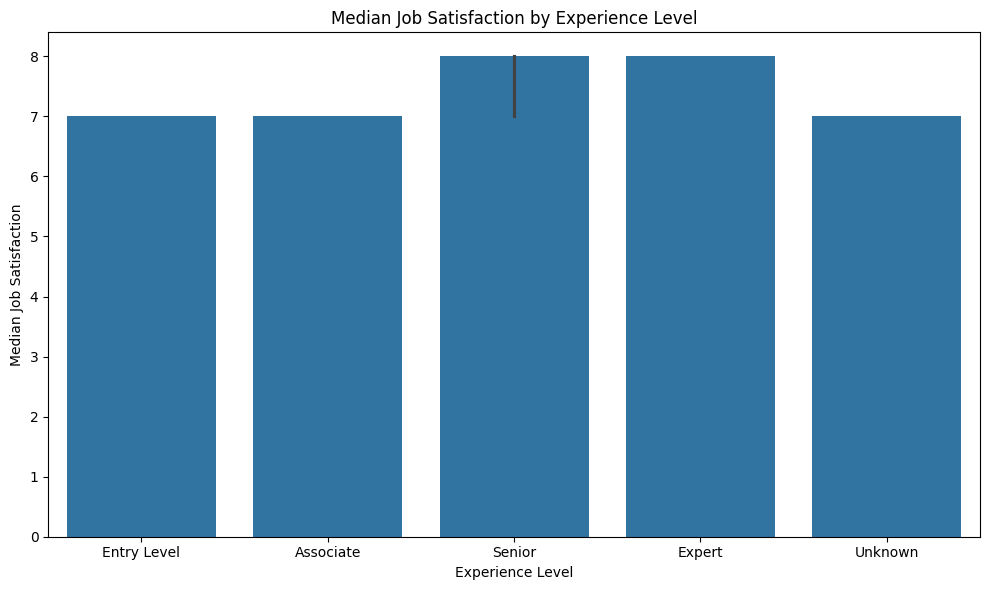

In [81]:
# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='ExperienceLevel', y='JobSat', estimator='median', order=[
    'Entry Level', 'Associate', 'Senior', 'Expert', 'Unknown'
])
plt.title('Median Job Satisfaction by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Median Job Satisfaction')
plt.tight_layout()
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


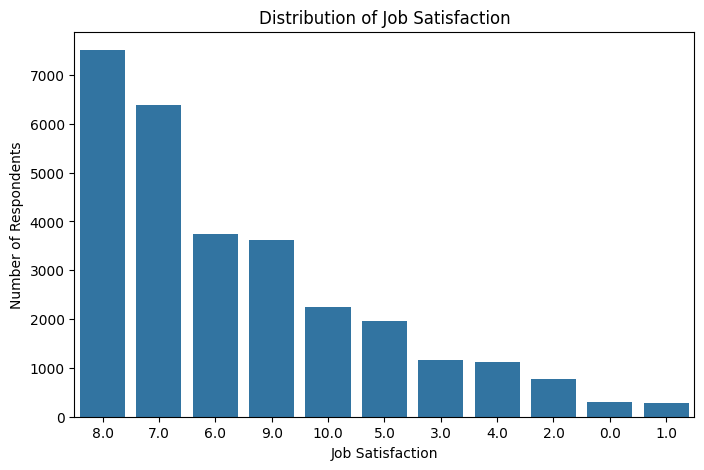

In [89]:
# Create count plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='JobSat', order=df['JobSat'].value_counts().index)

plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Respondents')
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


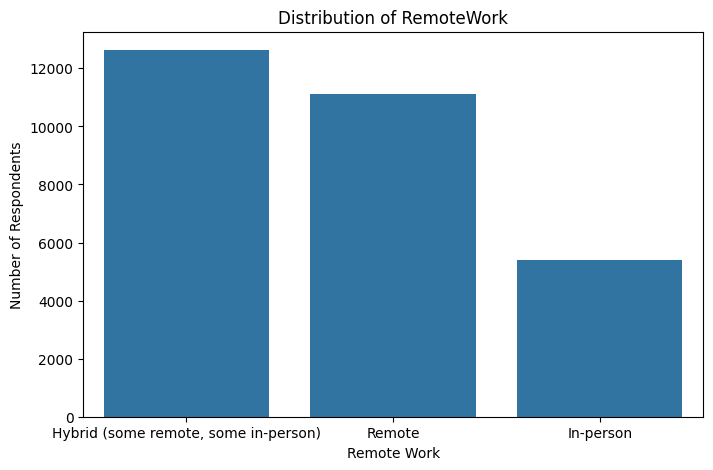

In [91]:
# Create count plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index)

plt.title('Distribution of RemoteWork')
plt.xlabel('Remote Work')
plt.ylabel('Number of Respondents')
plt.show()

In [93]:
# Cross-tabulate RemoteWork by Employment
remote_work_ct = pd.crosstab(df['Employment'], df['RemoteWork'])

# Display the result
print(f"Remote Work Preference by Employment Type: {remote_work_ct}")

Remote Work Preference by Employment Type: RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                10009   
Employed, full-time;Employed, part-time                                               49   
Employed, full-time;Independent contractor, fre...                                   829   
Employed, full-time;Independent contractor, fre...                                    53   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Independent contractor, free...                                     1   
Student, full-time;Not employed, but looking fo...                                     1   
Student, full-time;Not employed, but 

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [95]:
# View all unique values in the 'Country' column
print(f"Unique Country Entries: {df['Country'].unique()}")

Unique Country Entries: ['United States of America' 'Switzerland' 'Germany' 'Ireland' 'Italy'
 'Ukraine' 'Japan' 'Brazil' 'Austria' 'Romania'
 'United Kingdom of Great Britain and Northern Ireland' 'Bulgaria'
 'Turkey' 'Sweden' 'Croatia' 'Pakistan' 'Czech Republic'
 'Republic of North Macedonia' 'Finland' 'Slovakia' 'Poland' 'India'
 'Greece' 'United Republic of Tanzania' 'Sri Lanka' 'Netherlands' 'Latvia'
 'Portugal' 'Singapore' 'China' 'Philippines' 'Spain' 'Russian Federation'
 'Canada' 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Serbia' 'Morocco'
 'France' 'Taiwan' 'San Marino' 'Tunisia' 'Bangladesh' 'Nigeria'
 'Australia' 'Ecuador' 'Mexico' 'Albania' 'Israel' 'South Africa' 'Chile'
 'Lebanon' 'Iran, Islamic Republic of...' 'Algeria' 'Bolivia' 'Georgia'
 'Saudi Arabia' 'Cyprus' 'Paraguay' 'Slovenia' 'Costa Rica' 'Norway'
 'Jamaica' 'Denmark' 'Rwanda' 'Hungary' 'Indonesia'
 'Bosnia and Herzegovina' 'Thailand' 'Argentina' 'Peru'
 'Venezuela, Bolivarian Republic of...' 'Kazakhstan' '

In [97]:
# Define a mapping dictionary for Country column
country_mapping = {
    "United States of America": 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'Iran, Islamic Republic of...': 'Iran',
    'Venezuela, Bolivarian Republic of...': 'Venezuela',
    "Lao People's Democratic Republic": 'Laos',
    "Democratic People's Republic of Korea": 'South Korea',
    'Congo, Republic of the...': 'Congo',
    'Micronesia, Federated States of...': 'Micronesia',
    'NaN': pd.NA
}

# Apply the mapping
df['Country'] = df['Country'].replace(country_mapping)

In [99]:
# View all unique values in the 'LanguageHaveWorkedWith' column
print(f"Unique LanguageHaveWorkedWith Entries: {df['LanguageHaveWorkedWith'].unique()}")

Unique LanguageHaveWorkedWith Entries: ['JavaScript;Python;Ruby'
 'Bash/Shell (all shells);C#;JavaScript;PowerShell;VBA'
 'C#;HTML/CSS;JavaScript;PowerShell;SQL;TypeScript;VBA;Visual Basic (.Net)'
 ... 'Bash/Shell (all shells);C;C++;Fortran'
 'C#;JavaScript;Kotlin;PHP;Python'
 'Bash/Shell (all shells);C;C++;HTML/CSS;Java;JavaScript;PHP;SQL;TypeScript;VBA']


In [102]:
# Split the 'LanguageHaveWorkedWith' into lists
df['Languages'] = df['LanguageHaveWorkedWith'].str.split(';')

In [108]:
# Explode into one row per language per respondent
df_exploded = df.explode('Languages')
df_exploded.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ExperienceLevel,Languages
10,11,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,20,NaN,Project manager,NaN,NaN,NaN,NaN,NaN,USA,NaN,NaN,JavaScript;Python;Ruby,C#;Crystal;Java;JavaScript;Python;Ruby,JavaScript;Python;Ruby,Elasticsearch;MongoDB;PostgreSQL;SQLite,Elasticsearch;MongoDB;PostgreSQL;SQLite,Elasticsearch;MongoDB;PostgreSQL;SQLite,Amazon Web Services (AWS);Google Cloud,Google Cloud,Google Cloud,Node.js;React;Ruby on Rails,Django;Node.js;React;Ruby on Rails,Node.js;React;Ruby on Rails,NaN,NaN,NaN,NaN,NaN,NaN,Ansible;Docker;Kubernetes,Ansible;Docker;Kubernetes,Ansible;Docker;Kubernetes,Visual Studio Code,Visual Studio Code,Visual Studio Code,Windows;Windows Subsystem for Linux (WSL),Windows,Confluence;GitHub Discussions;Jira;Smartsheet,Confluence;GitHub Discussions;Jira,Confluence;GitHub Discussions;Jira,Discord;Google Meet;Microsoft Teams;Slack;Zoom,Discord;Google Meet;Microsoft Teams;Slack;Zoom,Discord;Google Meet;Microsoft Teams;Slack;Zoom,ChatGPT;GitHub Copilot;Google Gemini;Meta AI;V...,GitHub Copilot;Google Gemini;Visual Studio Int...,GitHub Copilot;Google Gemini;Visual Studio Int...,Stack Overflow for Teams (private knowledge sh...,A few times per week,Yes,Less than once per month or monthly,Quickly finding code solutions;Finding reliabl...,"Yes, definitely",Yes,Favorable,Increase productivity;Speed up learning;Improv...,Somewhat distrust,Neither good or bad at handling complex tasks,Learning about a codebase;Writing code;Documen...,Project planning;Testing code;Generating conte...,Committing and reviewing code;Deployment and m...,NaN,NaN,Learning about a codebase;Writing code;Documen...,NaN,NaN,No,Circulating misinformation or disinformation;M...,Don’t trust the output or answers;AI tools lac...,Yes,Individual contributor,15.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Strongly agree,Agree,Neither agree nor disagree,Neither agree nor disagree,3-5 ti

In [110]:
# Clean whitespace
df_exploded['Languages'] = df_exploded['Languages'].str.strip()

In [112]:
# Group by Country and Language, then count
language_usage = df_exploded.groupby(['Country', 'Languages']).size().reset_index(name='Count')

In [120]:
# Sort and view languages per country
languages_by_country = language_usage.sort_values(['Country', 'Count'], ascending=[True, False])

# Select only the top language per country
top_language_per_country = languages_by_country.groupby('Country').head(1)

# Display result
print(top_language_per_country)

          Country   Languages  Count
19    Afghanistan    HTML/CSS     11
59        Albania  JavaScript     11
77        Algeria    HTML/CSS     16
99        Andorra      Python      2
114        Angola  JavaScript      4
...           ...         ...    ...
4444    Venezuela  JavaScript     28
4475     Viet Nam  JavaScript     88
4499        Yemen        Dart      2
4513       Zambia  JavaScript      5
4527     Zimbabwe  JavaScript     11

[165 rows x 3 columns]


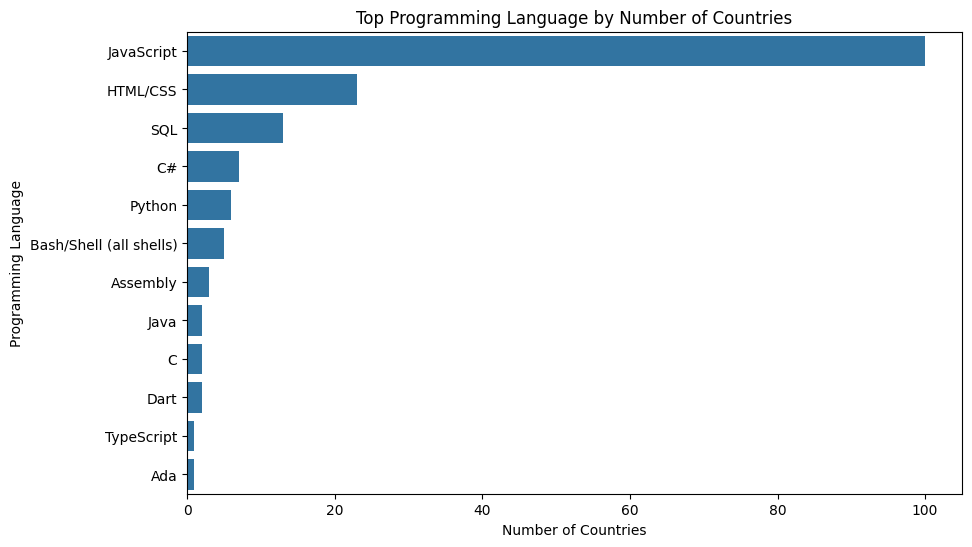

In [124]:
# Bar Plot to visualize the top programming language by country
# Count how many countries have each language as the most used
language_counts = top_language_per_country['Languages'].value_counts().reset_index()
language_counts.columns = ['Language', 'Number of Countries']

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=language_counts, x='Number of Countries', y='Language')
plt.title('Top Programming Language by Number of Countries')
plt.xlabel('Number of Countries')
plt.ylabel('Programming Language')
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [131]:
# check missing values
print(f"Missing values in 'YearsCodePro': {df['YearsCodePro'].isnull().sum()}")
print(f"Missing values in 'JobSatPoints_1': {df['JobSatPoints_1'].isnull().sum()}")

Missing values in 'YearsCodePro': 770
Missing values in 'JobSatPoints_1': 238


In [133]:
# View all unique values
print(f"Unique YearsCodePro Entries: {df['YearsCodePro'].unique()}")
print(f"Unique JobSatPoints_1 Entries: {df['JobSatPoints_1'].unique()}")

Unique YearsCodePro Entries: [ nan 12.  27.  10.   0.5 18.  15.  17.   6.   7.  16.  14.   4.   8.
  2.  29.   5.  30.   1.  25.  24.  26.   9.  20.  37.  11.   3.  13.
 19.  21.  23.  34.  28.  32.  22.  33.  40.  39.  31.  35.  41.  38.
 51.  36.  43.  42.  50.  45.  44.  46.  48.  47.  49. ]
Unique JobSatPoints_1 Entries: [ 50.     0.    10.    90.    30.    20.     5.     7.    40.    15.
    nan  80.    25.    70.    75.    60.    33.    35.    22.   100.
  17.     9.     6.     4.    34.    45.     8.     1.     3.    14.
  29.    67.     2.    18.    95.    11.    13.    55.    65.    19.
  39.    12.5   12.    85.    32.    89.    16.    99.    71.    27.
  57.    77.    26.    88.    78.    76.    87.    37.    98.    23.
  61.     2.5   86.    24.    56.    74.    69.    96.    13.5   81.
  44.    79.    18.75  66.    21.    28.    38.    52.    49.     3.75
  68.    91.    37.5   31.     8.5   63.    47.    97.    83.    43.
   7.5   36.  ]


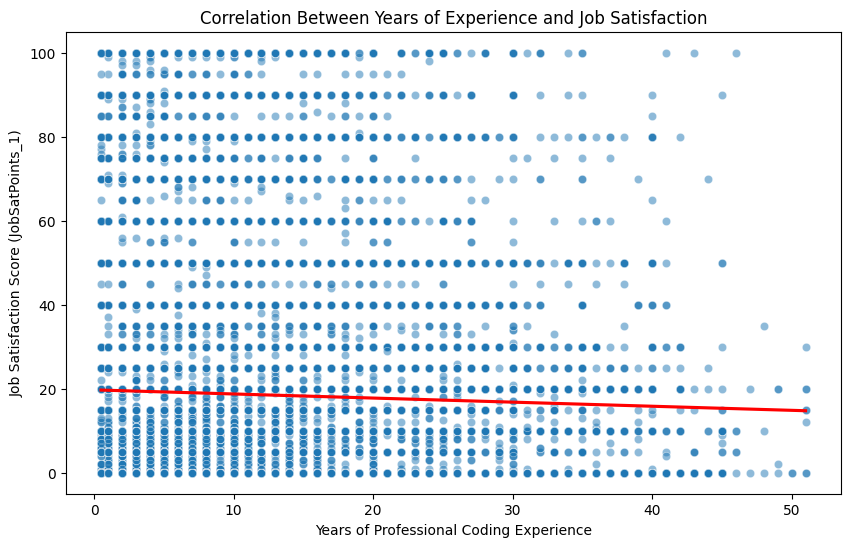

In [135]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='YearsCodePro', y='JobSatPoints_1', alpha=0.5)
sns.regplot(data=df, x='YearsCodePro', y='JobSatPoints_1', scatter=False, color='red', ci=None)

plt.title('Correlation Between Years of Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score (JobSatPoints_1)')
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [137]:
# check missing values
print(f"Missing values in 'EdLevel': {df['EdLevel'].isnull().sum()}")
print(f"Missing values in 'Employment': {df['Employment'].isnull().sum()}")

Missing values in 'EdLevel': 0
Missing values in 'Employment': 0


In [141]:
# View all unique values in the 'EdLevel' column
print(f"Unique EdLevel Entries: {df['EdLevel'].unique()}")

Unique EdLevel Entries: ['Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
 'Some college/university study without earning a degree'
 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Associate degree (A.A., A.S., etc.)' 'Something else'
 'Primary/elementary school']


In [143]:
# Define a mapping dictionary for EdLevel column
EdLevel_mapping = {
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor’s degree",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master’s degree",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary school",
    "Professional degree (JD, MD, Ph.D, Ed.D, etc.)": "Professional degree",
    "Associate degree (A.A., A.S., etc.)": 'Associate degree',
    'NaN': pd.NA
}

# Apply the mapping
df['EdLevel'] = df['EdLevel'].replace(EdLevel_mapping)

In [145]:
# View all unique values in the 'Employment' column
print(f"Unique Employment Entries: {df['Employment'].unique()}")

Unique Employment Entries: ['Employed, full-time' 'Employed, full-time;Student, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Student, full-time'
 'Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time'
 'Employed, full-time;Employed, part-time'
 'Independent contractor, freelancer, or self-employed'
 'Student, part-time;Employed, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Not employed, but looking for work' 'Employed, part-time'
 'Student, full-time;Independent contractor, freelancer, or self-employed'
 'Student, full-time;Employed, part-time'
 'Independent contractor, freelancer, or self-employed;Student, part-time'
 'Employed, full

In [159]:
# Define priority order (most stable job types first)
employment_priority = [
    'Employed, full-time',
    'Employed, part-time',
    'Independent contractor, freelancer, or self-employed',
    'Student, full-time',
    'Student, part-time',
    'Not employed, but looking for work',
    'Not employed, and not looking for work',
    'Retired',
    'I prefer not to say'
]

# Function to extract primary employment type
def extract_primary_employment(entry):
    if pd.isnull(entry):
        return 'Unknown'
    roles = [r.strip() for r in entry.split(';')]
    for role in employment_priority:
        if role in roles:
            return role
    return 'Other'

# Apply the transformation
df['PrimaryEmployment'] = df['Employment'].apply(extract_primary_employment)

In [167]:
# View all unique values in the 'PrimaryEmployment' column
print(f"Unique PrimaryEmployment Entries: {df['PrimaryEmployment'].unique()}")

Unique PrimaryEmployment Entries: ['Employed, full-time'
 'Independent contractor, freelancer, or self-employed'
 'Employed, part-time' 'Not employed, but looking for work']


In [175]:
# Cross-tabulate EdLevel vs Employment
edu_employment_ct = pd.crosstab(df['EdLevel'], df['PrimaryEmployment'])

# Display cross-tab
print(f"Cross-tabulation of Education Level and Employment Type: {edu_employment_ct}")

Cross-tabulation of Education Level and Employment Type: PrimaryEmployment                                   Employed, full-time  \
EdLevel                                                                   
Associate degree                                                    817   
Bachelor’s degree                                                 12053   
Master’s degree                                                    7664   
Primary/elementary school                                           122   
Professional degree                                                1294   
Secondary school                                                   1143   
Some college/university study without earning a...                 2878   
Something else                                                      260   

PrimaryEmployment                                   Employed, part-time  \
EdLevel                                                                   
Associate degree                          

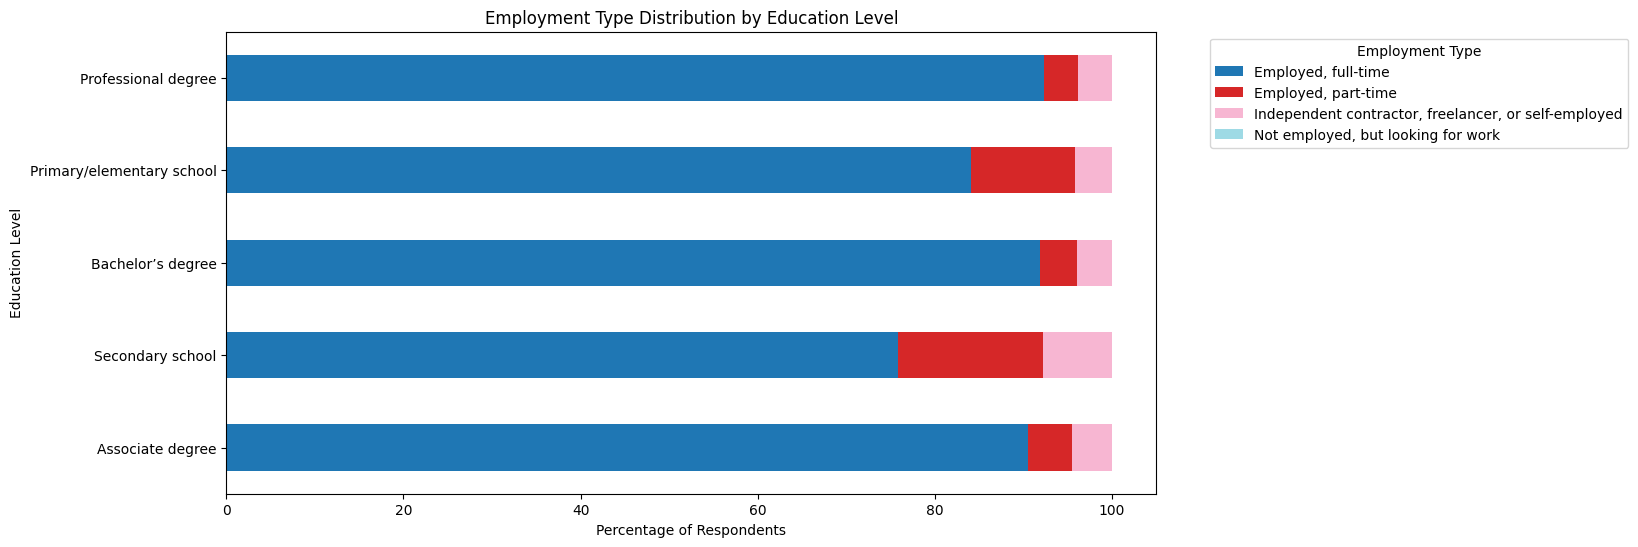

In [177]:
# Plot as a stacked bar chart
edu_employment_pct_sorted = edu_employment_pct.loc[edu_employment_pct.sum(axis=1).sort_values(ascending=False).index[:5]]

edu_employment_pct_sorted.plot(kind='barh', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Employment Type Distribution by Education Level')
plt.xlabel('Percentage of Respondents')
plt.ylabel('Education Level')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [179]:
df.to_csv("modified_survey_data.csv", index=False)
print("Dataset saved successfully as 'modified_survey_data.csv'")

Dataset saved successfully as 'modified_survey_data.csv'


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
